In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
#Case 7A: k = 1e-15 || CO2 injection at 60°C (&42MPa) + H2O in the reservoir || 400m Well Spacing || m_flux_CO2 = 6

In [3]:
k_CO2_1em15 = pd.read_csv('CO2_7A_csv.csv')
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_CO2_1em15["Energy Production at this timestep"] = (k_CO2_1em15.mass_kg_h2o_extracted_this_timestep * k_CO2_1em15.h_w)*1000
k_CO2_1em15["Cumulative Energy Produced"] = k_CO2_1em15["Energy Production at this timestep"].cumsum()
k_CO2_1em15["Cumulative Produced CO2"] = k_CO2_1em15["mass_kg_co2_extracted_this_timestep"].cumsum()
# Injected CO2: time * mass flow CO2
k_CO2_1em15["Injected CO2 [kg]"] = k_CO2_1em15["time"]*6
#Conversion to kilotons
k_CO2_1em15["Injected CO2 [kt]"] = k_CO2_1em15["Injected CO2 [kg]"]*1e-6
#
#MW produced:

k_CO2_1em15["MW"] = (k_CO2_1em15["Cumulative Energy Produced"]/1e6)/k_CO2_1em15["time"]

#Stored CO2:
# = Injected CO2 - produced CO2 [kg]
k_CO2_1em15["Stored CO2 [kt]"] = (k_CO2_1em15["Injected CO2 [kg]"] - k_CO2_1em15["mass_kg_co2_extracted_this_timestep"])*1e-6

k_CO2_1em15["Time [y]"] = k_CO2_1em15["time"]/3.154E7
k_CO2_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_CO2_1em15

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Cumulative Produced CO2,Injected CO2 [kg],Injected CO2 [kt],MW,Stored CO2 [kt],Time [y]
0,0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0000,NaN,0.000000,0.000000
1,86400,0.000000e+00,1.000000,457061.348482,3.046229e+06,0.000000e+00,3.074222e+09,0.000000e+00,1004.066192,0.000038,...,127.487236,772.648135,3.058615e+12,3.058615e+12,0.000000e+00,518400,0.5184,35.400641,0.518400,0.002739
2,259200,0.000000e+00,1.000000,457110.969811,3.051077e+06,0.000000e+00,4.923169e+09,0.000000e+00,1606.319311,0.000038,...,125.749730,772.435531,4.901004e+12,7.959619e+12,0.000000e+00,1555200,1.5552,30.708406,1.555200,0.008218
3,604800,0.000000e+00,1.000000,457061.611375,3.053526e+06,0.000000e+00,8.860397e+09,0.000000e+00,2890.564707,0.000038,...,124.805392,772.157436,8.826414e+12,1.678603e+13,0.000000e+00,3628800,3.6288,27.754683,3.628800,0.019176
4,1296000,0.000000e+00,1.000000,456932.624864,3.055063e+06,0.000000e+00,1.627611e+10,0.000000e+00,5310.801131,0.000038,...,124.123126,771.758693,1.622483e+13,3.301086e+13,0.000000e+00,7776000,7.7760,25.471345,7.776000,0.041091
5,2678400,0.000000e+00,1.000000,456724.444715,3.056080e+06,0.000000e+00,3.004334e+10,0.000000e+00,9807.135212,0.000038,...,123.558641,771.230036,2.997139e+13,6.298226e+13,0.000000e+00,16070400,16.0704,23.514881,16.070400,0.084921
6,5443200,0.000000e+00,1.000000,456455.371666,3.056757e+06,0.000000e+00,5.548000e+10,0.000000e+00,18120.462638,0.000038,...,123.063373,770.635130,5.538985e+13,1.183721e+14,0.000000e+00,32659200,32.6592,21.746787,32.659200,0.172581
7,10972800,0.000000e+00,1.000000,456171.766974,3.057309e+06,0.000000e+00,1.022234e+11,0.000000e+00,33402.792589,0.000038,...,122.601110,770.113632,1.021226e+14,2.204948e+14,0.000000e+00,65836800,65.8368,20.094666,65.836800,0.347901
8,22032000,0.000000e+00,1.000000,455928.914263,3.058086e+06,0.000000e+00,1.859922e+11,0.000000e+00,60784.024123,0.000038,...,122.094882,769.795593,1.858828e+14,4.063776e+14,0.000000e+00,132192000,132.1920,18.444878,132.192000,0.698542
9,44150400,0.000000e+00,1.000000,455759.082645,3.059317e+06,0.000000e+00,3.303512e+11,0.000000e+00,107937.467318,0.000038,...,121.492347,769.700439,3.302149e+14,7.365924e+14,0.000000e+00,264902400,264.9024,16.683709,264.902400,1.399822


In [4]:
#Case 7B: k = 1e-15 || H2O only - injection Temp 60°C (&42MPa) || 400m Well Spacing || m_flux_H2O = 6,7 kg/s 

In [5]:
k_H2O_1em15 = pd.read_csv("H2O_7B_csv.csv")
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_H2O_1em15["Energy Production at this timestep"] = (k_H2O_1em15.mass_kg_h2o_extracted_this_timestep * k_H2O_1em15.h_w)*1000
k_H2O_1em15["Cumulative Energy Produced"] = k_H2O_1em15["Energy Production at this timestep"].cumsum()
# Injected H2O: time * mass flow H2O
k_H2O_1em15["Injected H2O [kg]"] = k_H2O_1em15["time"]*6.7
# Production mass rate:
k_H2O_1em15["Production mass flow kg/s"] = k_H2O_1em15["mass_kg_h2o_extracted_this_timestep"]/k_H2O_1em15["time"]
#Cumulative Injected:
#k_H2O_1em15["Cumulative Mass Injected"] = k_H2O_1em15["Injected H2O [kg]"].cumsum()
#Producing more than injected?:
k_H2O_1em15["Stored mass in kg"] = k_H2O_1em15["Injected H2O [kg]"] - k_H2O_1em15["mass_kg_h2o_extracted_this_timestep"]
#
#MW produced:

k_H2O_1em15["MW"] = (k_H2O_1em15["Cumulative Energy Produced"]/1e6)/k_H2O_1em15["time"]

k_H2O_1em15["Time [y]"] = k_H2O_1em15["time"]/3.154E7
k_H2O_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_H2O_1em15

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_g$,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Injected H2O [kg],Production mass flow kg/s,Stored mass in kg,MW,Time [y]
0,0,0,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,0.000000
1,86400,0,1,457061.348471,3.046229e+06,0,3.074222e+09,0,1004.066196,0.000038,...,208.563627,127.487236,772.648135,3.058615e+12,3.058615e+12,5.788800e+05,0.011621,5.778759e+05,35.400641,0.002739
2,259200,0,1,457110.969928,3.051077e+06,0,4.923169e+09,0,1606.319086,0.000038,...,206.750815,125.749728,772.435531,4.901003e+12,7.959618e+12,1.736640e+06,0.006197,1.735034e+06,30.708404,0.008218
3,604800,0,1,457061.613994,3.053526e+06,0,8.860373e+09,0,2890.556626,0.000038,...,205.744276,124.805366,772.157437,8.826389e+12,1.678601e+13,4.052160e+06,0.004779,4.049269e+06,27.754642,0.019176
4,1296000,0,1,456932.597729,3.055062e+06,0,1.627655e+10,0,5310.945742,0.000038,...,204.996896,124.123360,771.758677,1.622527e+13,3.301128e+13,8.683200e+06,0.004098,8.677889e+06,25.471663,0.041091
5,2678400,0,1,456723.686539,3.056064e+06,0,3.006278e+10,0,9813.517643,0.000038,...,204.362938,123.563884,771.229368,2.999074e+13,6.300202e+13,1.794528e+07,0.003664,1.793547e+07,23.522258,0.084921
6,5443200,0,1,456451.049281,3.056682e+06,0,5.564981e+10,0,18176.263687,0.000038,...,203.803633,123.086756,770.630386,5.555906e+13,1.185611e+14,3.646944e+07,0.003339,3.645126e+07,21.781502,0.172581
7,10972800,0,1,456165.860857,3.057236e+06,0,1.025122e+11,0,33497.870772,0.000038,...,203.254028,122.622047,770.105878,1.024109e+14,2.209720e+14,7.351776e+07,0.003053,7.348426e+07,20.138158,0.347901
8,22032000,0,1,455901.182151,3.057738e+06,0,1.888031e+11,0,61708.765874,0.000038,...,202.748664,122.196171,769.761537,1.886892e+14,4.096612e+14,1.476144e+08,0.002801,1.475527e+08,18.593918,0.698542
9,44150400,0,1,455688.378788,3.058567e+06,0,3.415382e+11,0,111618.023693,0.000038,...,202.175743,121.699658,769.612791,3.413912e+14,7.510524e+14,2.958077e+08,0.002528,2.956961e+08,17.011225,1.399822


In [6]:
# Cumulative Energy Production over 20 Years: H2O only vs. CO2 injection

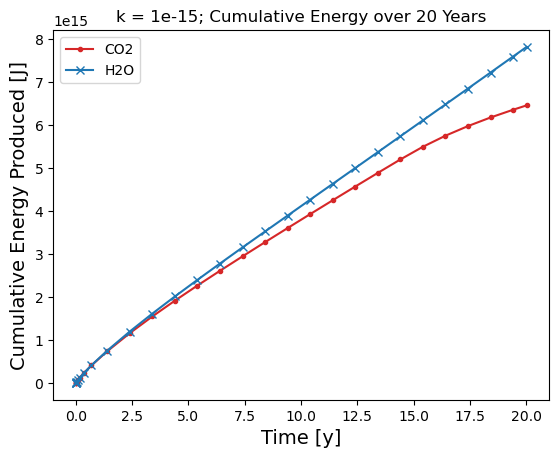

In [7]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Energy Produced"],'C3', marker=".", linestyle ='-', label='CO2')
plt.plot(k_H2O_1em15["Time [y]"], k_H2O_1em15["Cumulative Energy Produced"],'C0', marker="x", linestyle ='-', label='H2O')
plt.title("k = 1e-15; Cumulative Energy over 20 Years")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Energy Produced [J]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case7/Case7_cum_energy_k_1em15.png')

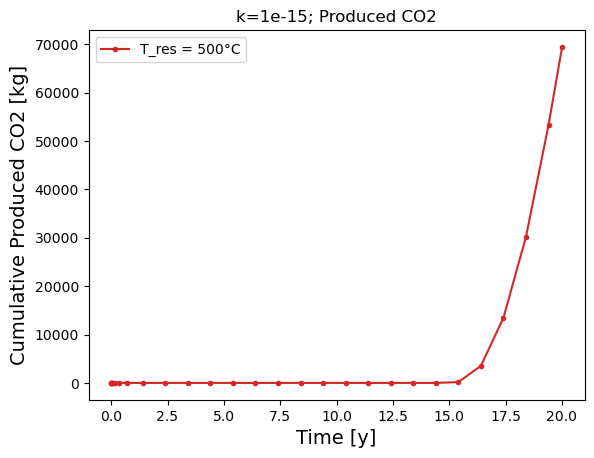

In [8]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Produced CO2"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Produced CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Produced CO2 [kg]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case7/Case7_co2_production_k_1em15.png')

In [9]:
# Mass of injected CO2 at 6kg/s CO2 mass flux

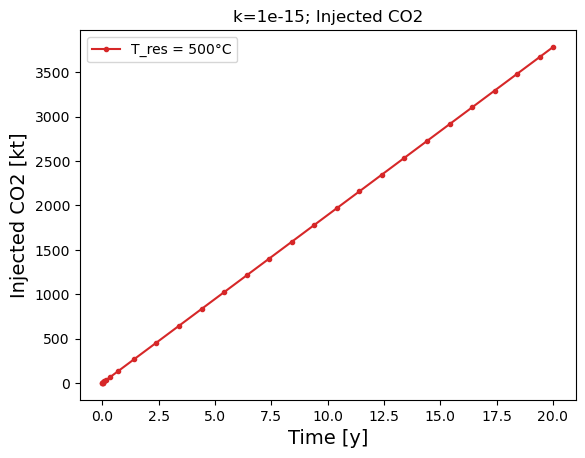

In [10]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Injected CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Injected CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Injected CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case7/Case7_co2_injection_k_1em15.png')

In [11]:
#Stored CO2 in kt at mass flux CO2 6kg/s 

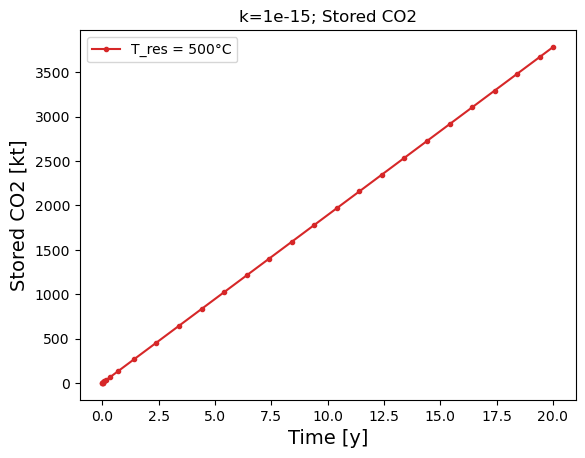

In [12]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Stored CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Stored CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Stored CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case7/Case7_co2_stored_k_1em15.png')

In [13]:
k_CO2_1em14 = pd.read_csv('CO2_8A_csv.csv')
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_CO2_1em14["Energy Production at this timestep"] = (k_CO2_1em14.mass_kg_h2o_extracted_this_timestep * k_CO2_1em14.h_w)*1000
k_CO2_1em14["Cumulative Energy Produced"] = k_CO2_1em14["Energy Production at this timestep"].cumsum()
k_CO2_1em14["Cumulative Produced CO2"] = k_CO2_1em14["mass_kg_co2_extracted_this_timestep"].cumsum()
# Injected CO2: time * mass flow CO2
k_CO2_1em14["Injected CO2 [kg]"] = k_CO2_1em14["time"]*6
#Conversion to kilotons
k_CO2_1em14["Injected CO2 [kt]"] = k_CO2_1em14["Injected CO2 [kg]"]*1e-6
#
#MW produced:

k_CO2_1em14["MW"] = (k_CO2_1em14["Cumulative Energy Produced"]/1e6)/k_CO2_1em14["time"]

#Stored CO2:
# = Injected CO2 - produced CO2 [kg]
k_CO2_1em14["Stored CO2 [kt]"] = (k_CO2_1em14["Injected CO2 [kg]"] - k_CO2_1em14["mass_kg_co2_extracted_this_timestep"])*1e-6

k_CO2_1em14["Time [y]"] = k_CO2_1em14["time"]/3.154E7
k_CO2_1em14.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_CO2_1em14

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Cumulative Produced CO2,Injected CO2 [kg],Injected CO2 [kt],MW,Stored CO2 [kt],Time [y]
0,0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.0000,NaN,0.000000,0.000000
1,86400,0.000000e+00,1.000000,457718.633211,3.064773e+06,0.000000e+00,1.426470e+10,0.000000,4642.682819,0.000038,...,121.305025,772.588707,1.422877e+13,1.422877e+13,0.000000,518400,0.5184,164.684813,0.518400,0.002739
2,259200,0.000000e+00,1.000000,457617.002648,3.066664e+06,0.000000e+00,2.429190e+10,0.000000,7906.689864,0.000038,...,120.525153,772.219153,2.424716e+13,3.847593e+13,0.000000,1555200,1.5552,148.441075,1.555200,0.008218
3,604800,0.000000e+00,1.000000,457442.729176,3.067350e+06,0.000000e+00,4.403209e+10,0.000000,14337.330751,0.000038,...,120.117362,771.778201,4.397761e+13,8.245354e+13,0.000000,3628800,3.6288,136.331904,3.628800,0.019176
4,1296000,0.000000e+00,1.000000,457238.658041,3.067681e+06,0.000000e+00,8.073334e+10,0.000000,26299.314428,0.000038,...,119.811400,771.329205,8.067792e+13,1.631315e+14,0.000000,7776000,7.7760,125.873033,7.776000,0.041091
5,2678400,0.000000e+00,1.000000,457060.831972,3.068126e+06,0.000000e+00,1.464218e+11,0.000000,47710.519977,0.000038,...,119.488704,770.997046,1.463819e+14,3.095133e+14,0.000000,16070400,16.0704,115.559041,16.070400,0.084921
6,5443200,0.000000e+00,1.000000,456952.431921,3.068978e+06,0.000000e+00,2.579395e+11,0.000000,84043.079260,0.000038,...,119.082286,770.865814,2.579263e+14,5.674397e+14,0.000000,32659200,32.6592,104.247442,32.659200,0.172581
7,10972800,0.000000e+00,1.000000,456902.547335,3.070057e+06,0.000000e+00,4.447038e+11,0.000000,144854.177931,0.000038,...,118.647169,770.889205,4.447106e+14,1.012150e+15,0.000000,65836800,65.8368,92.241753,65.836800,0.347901
8,22032000,0.000000e+00,1.000000,456853.098282,3.070811e+06,0.000000e+00,7.843267e+11,0.000000,255415.951349,0.000038,...,118.330363,770.934487,7.843342e+14,1.796485e+15,0.000000,132192000,132.1920,81.539784,132.192000,0.698542
9,44150400,0.000000e+00,1.000000,456745.802140,3.070860e+06,0.000000e+00,1.472432e+12,0.000000,479483.285907,0.000038,...,118.215692,770.896028,1.472426e+15,3.268911e+15,0.000000,264902400,264.9024,74.040342,264.902400,1.399822


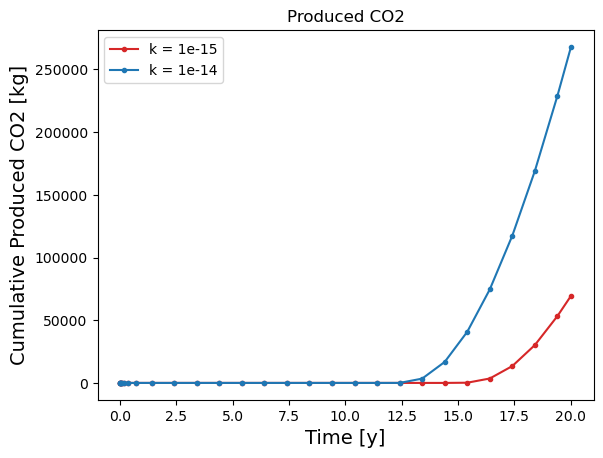

In [17]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Produced CO2"],'C3', marker=".", linestyle ='-', label='k = 1e-15')
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Cumulative Produced CO2"],'C0', marker=".", linestyle ='-', label='k = 1e-14')
plt.title("Produced CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Produced CO2 [kg]',fontsize=14)
plt.legend()
plt.savefig('Figures/CO2Production/Case7_vs_Case8_co2_production.png', bbox_inches='tight')